In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
oracle_df = pd.read_pickle('oracle_scores.pkl')
traces_df = pd.read_pickle('oracle_traces.pkl')

In [3]:
percentiles = [99, 79, 34]
target_scores = [np.percentile(oracle_df.oracle_score.values, p).round(2) for p in percentiles]
target_scores

[0.51, 0.26, 0.12]

In [4]:
selected_df = []
for score in target_scores:
    selected_df.append(traces_df.query(f'oracle_score > {score - 0.01} and oracle_score < {score + 0.01}').sample(1, random_state=1))
selected_df = pd.concat(selected_df)

Text(0.5, 0, '10 sec')

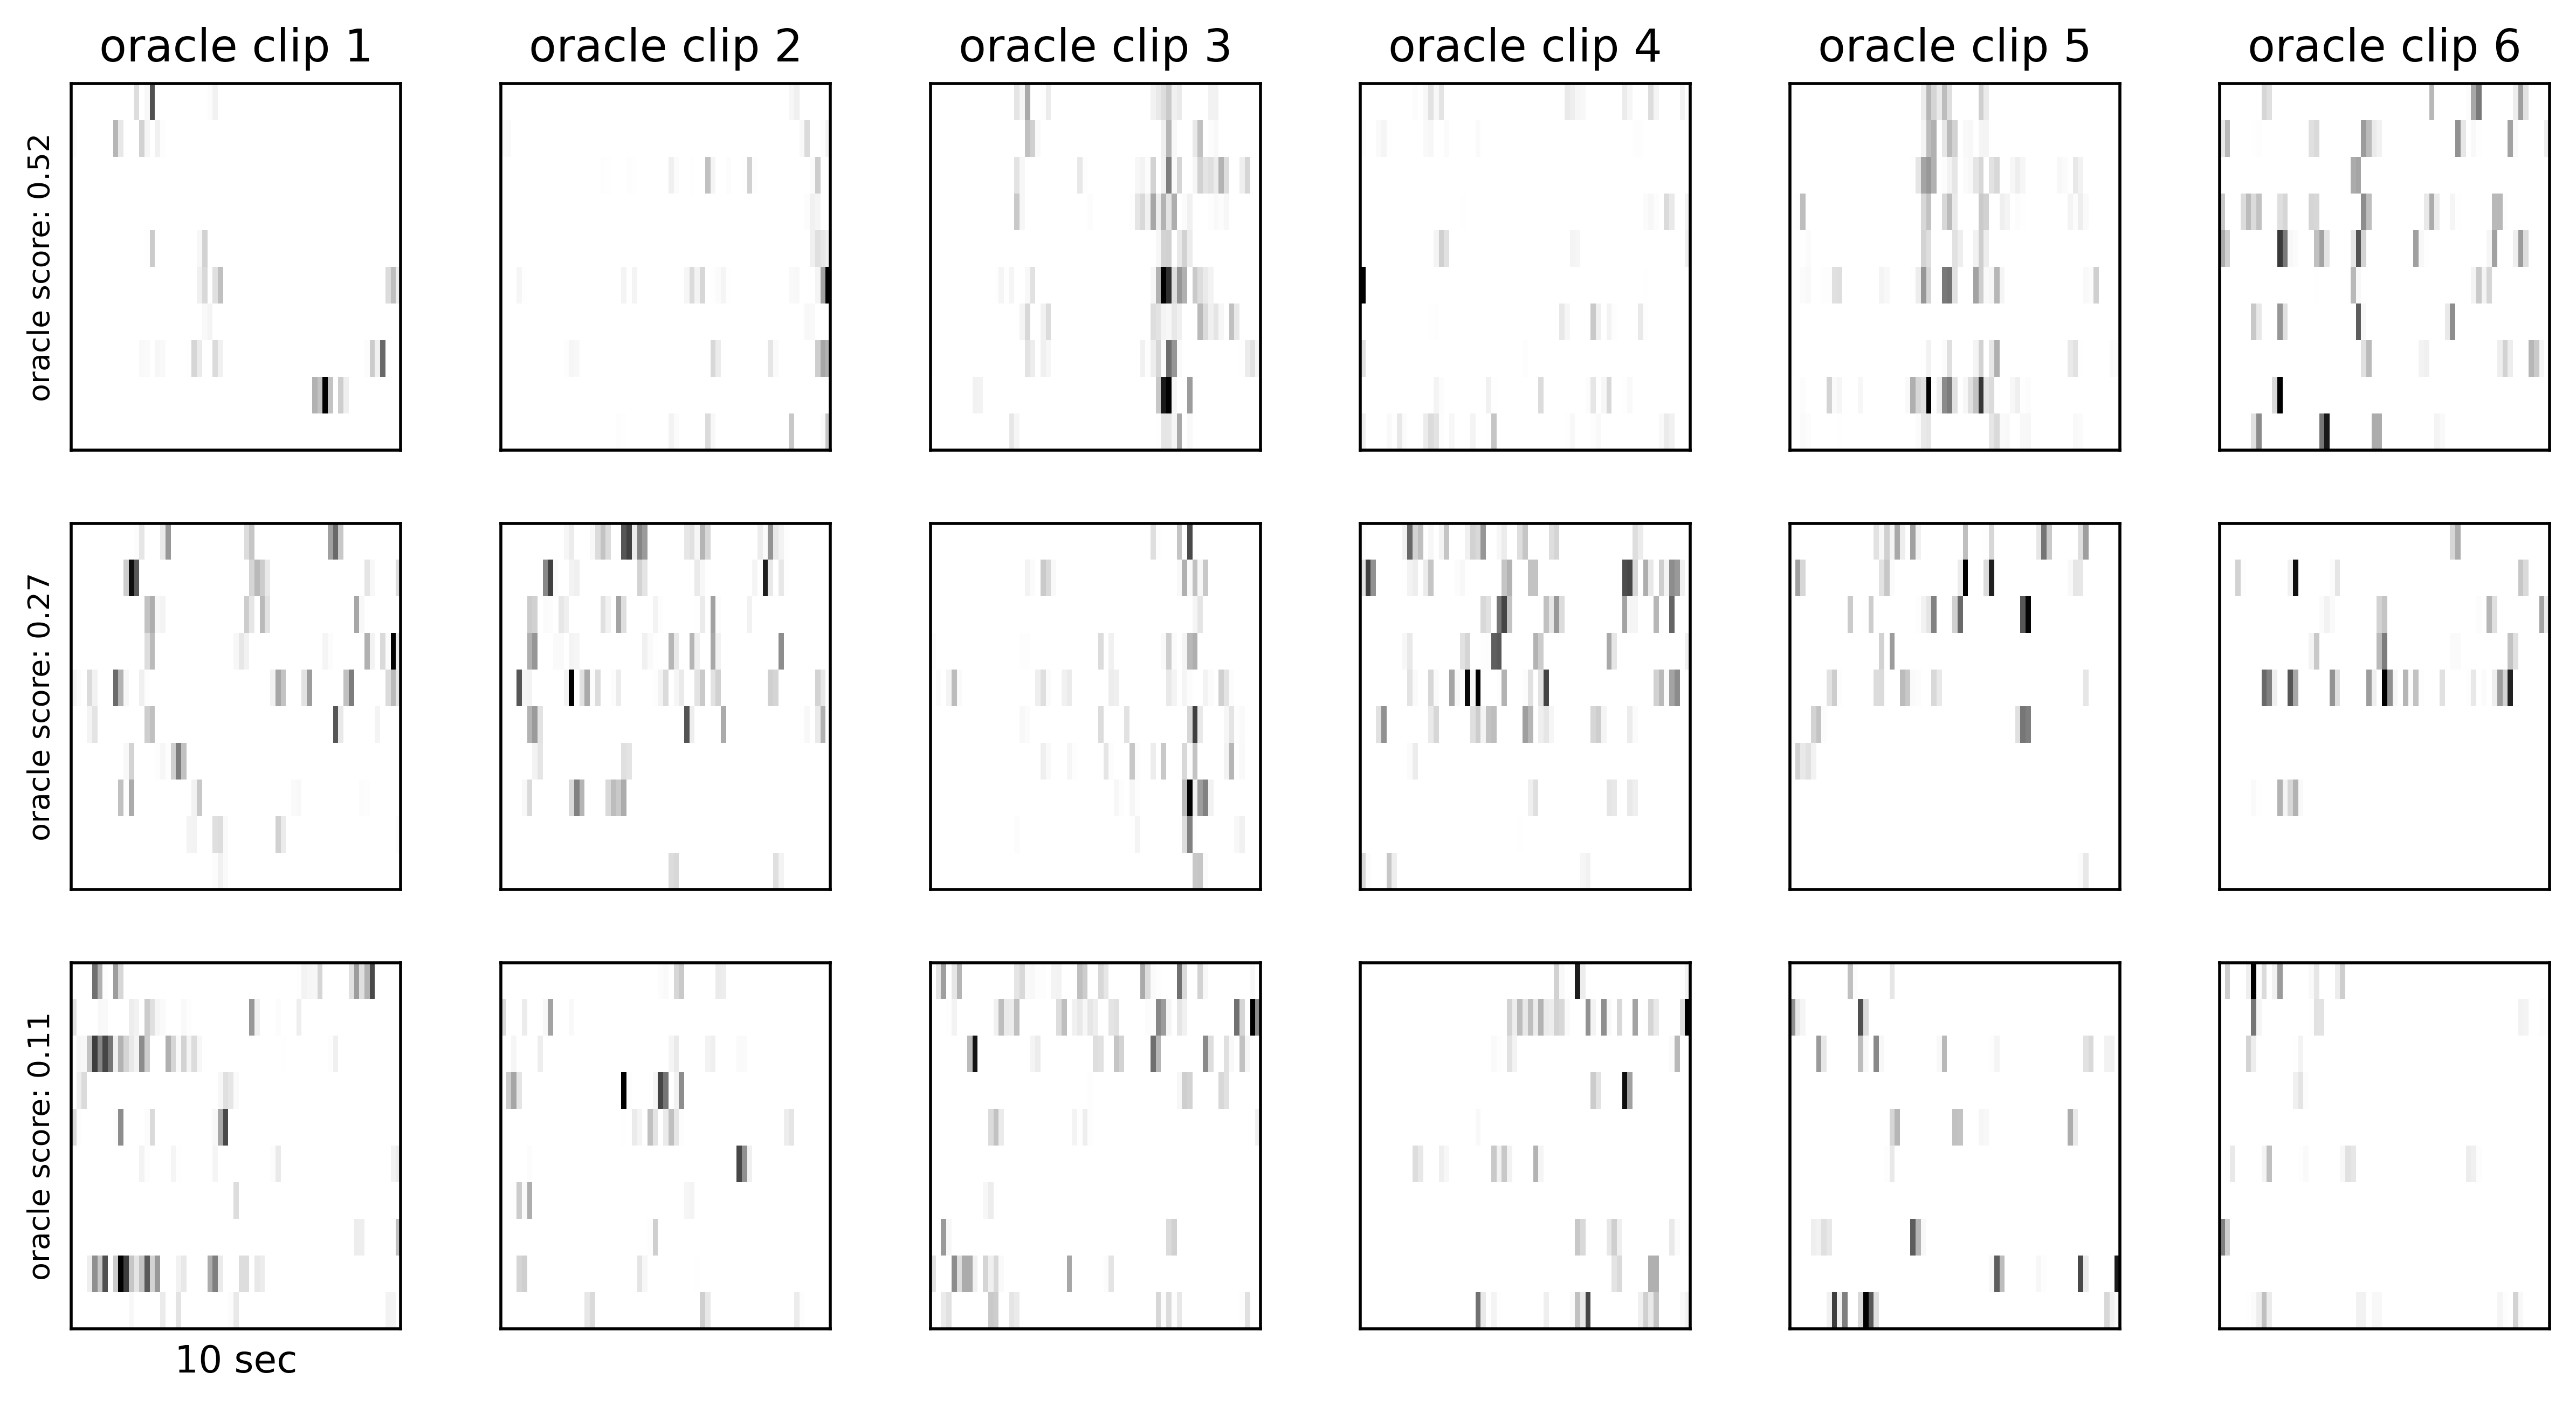

In [5]:
fig, axes = plt.subplots(3, 6, dpi=500, figsize=(12, 6))
for i, row in enumerate(axes):
    for j, ax in enumerate(row):
        obj = ax.imshow(np.repeat(selected_df.iloc[i].oracle_trace, 7, axis=0)[:, j], cmap='binary')
        ax.set_xticks([])
        ax.set_yticks([])
        
    row[0].set_ylabel(f'oracle score: {selected_df.iloc[i].oracle_score:.2f}', fontsize=8)
for i, ax in enumerate(axes[0]):
    ax.set_title(f'oracle clip {i+1}')
axes[2, 0].set_xlabel('10 sec')